# ReExam 24th of August 2022, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 5 problems each worth 8 points for a total of 40 points, to pass you need
15 points.

## Some general hints and information:
* Some problems are similar to the exam in January but changed.
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam has no anonymous exam ID due to a technical issue, however this does not mean
that the exam is not anonymous. The grading system will automatically download all the exams from Studium
and it is at this stage that they are anonymized by a randomized ID.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
* I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not use encrypted communications
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!


---
## Exam vB, PROBLEM 1
Maximum Points = 8


## Probability warmup
Let's say we have an exam question which consists of $50$ yes/no questions. 
From past performance of similar students, a randomly chosen student will know the correct answer to $N \sim \text{binom}(50,0.8)$ questions. Furthermore, we assume that the student will guess the answer with equal probability to each question they don't know the answer to, i.e. given $N$ we define $Z \sim \text{binom}(50-N,1/2)$ as the number of correctly guessed answers. Define $Y = N + Z$, i.e., $Y$ represents the number of total correct answers.

We are interested in setting a deterministic threshold $T$, i.e., we would pass a student at threshold $T$ if $Y \geq T$. Here $T \in \{0,1,2,\ldots,50\}$.

1. [3p] Produce a simulation of $1000$ students. Hint: Simulate $N$ first then simulate $Y \mid N$ and add the results. Numpy has `numpy.random.binomial` which you can simulate from.
2. [3p] For each threshold $T$, produce a simulation as above and estimate the probability that the student *knows* less than $40$ correct answers given that the student passed, i.e., $N < 40$. Put the answer in `problem11_probabilities` as a list.
3. [2p] What is the smallest value of $T$ such that if $Y \geq T$ then we are 90\% certain that $N \geq 40$?

In [18]:
import numpy as np

def create_samples():
    
    correct_answers = np.random.binomial(50, 0.8, 1000)
    guessed_answers = 50-correct_answers
    correct_guessed_answers = np.random.binomial(guessed_answers, 0.5)
    #Y = N+Z = correct_answers + correct_guessed_answers
    Y = np.add(correct_answers, correct_guessed_answers)
    
    return Y

#Y = [correct_answers[i] + correct_guessed_answers[i] for i in range(1000)]
# Part 1:
problem1_1000_samples = create_samples()
print(problem1_1000_samples)

[48 47 47 45 45 43 43 44 47 45 47 46 46 45 46 45 42 45 41 47 47 46 45 48
 46 45 45 46 41 47 43 43 43 47 43 45 48 43 46 46 47 41 46 43 46 45 50 49
 47 46 47 44 45 43 44 44 47 45 45 45 43 43 42 47 45 44 46 44 45 43 48 46
 44 46 47 45 44 48 45 46 46 45 42 47 42 43 48 44 42 40 41 43 47 46 40 41
 45 43 49 48 44 46 45 48 42 42 40 47 45 42 47 45 44 47 49 49 45 45 41 42
 44 46 46 38 47 45 47 40 47 45 44 44 44 47 43 45 44 39 48 46 46 41 40 47
 44 45 43 46 40 41 46 43 44 48 48 47 44 45 44 46 44 46 46 44 41 45 49 43
 46 45 45 41 40 46 45 45 44 43 45 45 48 47 46 44 44 45 45 47 46 45 42 45
 43 45 48 40 48 48 45 45 43 44 47 44 42 45 48 46 46 45 45 47 44 47 46 49
 42 42 42 45 44 44 42 42 47 44 43 44 43 42 43 48 49 47 45 44 40 44 43 45
 47 42 45 47 45 42 48 47 44 37 47 41 43 43 46 45 44 47 42 45 43 44 41 44
 44 41 44 48 46 43 48 43 43 45 47 47 45 47 42 48 44 47 48 44 43 45 42 41
 43 48 46 43 46 46 47 43 40 43 44 40 47 46 46 45 45 47 46 45 46 44 48 47
 44 42 45 43 47 48 44 45 44 47 46 45 40 44 44 45 49

In [22]:

# Part 2: 
# replace XXX to represent P(N < 40) for T = [0,1,2,...,50], i.e. your answer should be a list
# of length 51.
probs = []
for T in range (51):
    correct_answers = np.random.binomial(50, 0.8, 1000) # N
    guessed_answers = 50-correct_answers # 50 - N
    correct_guessed_answers = np.random.binomial(guessed_answers, 0.5) #Z
    Y = np.add(correct_answers, correct_guessed_answers)
    
    # P( N<40 | Y>T ) = P (N<40 AND Y>T) / P (Y>T) Bayes Theorem
    
    P_N_less_40_and_Y_great_T = np.mean([1 if (Y[i] >= T and correct_answers[i]<40 ) else 0 for i in range (1000)])
    P_Y_great_T = np.mean([1 if (Y[i] >= T) else 0 for i in range (1000)])
    P_N_less_40_given_Pass = P_N_less_40_and_Y_great_T/P_Y_great_T
    probs.append(P_N_less_40_given_Pass)
    
    
problem1_probabilities = probs
print(problem1_probabilities)

[0.433, 0.396, 0.421, 0.416, 0.41, 0.393, 0.412, 0.423, 0.397, 0.422, 0.44, 0.414, 0.438, 0.407, 0.435, 0.411, 0.396, 0.436, 0.424, 0.415, 0.415, 0.416, 0.403, 0.413, 0.422, 0.417, 0.44, 0.399, 0.401, 0.439, 0.426, 0.4, 0.416, 0.396, 0.412, 0.463, 0.425, 0.404, 0.3921765295887663, 0.3997995991983968, 0.397979797979798, 0.42374616171954965, 0.4029535864978903, 0.36444444444444446, 0.31225806451612903, 0.2188006482982172, 0.17176470588235293, 0.13671875, 0.06363636363636364, 0.0, 0.0]


In [23]:

# Part 3: Give an integer between 0 and 50 which is the answer to 2.
problem1_T = 48

---
## Exam vB, PROBLEM 2
Maximum Points = 8


In many areas of data science and machine learning we need to produce random samples in different ways. This can be done to compute difficult integrals or validate algorithms. 

1. [2p] Produce 1000 samples from the distribution below using inversion sampling
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \sin(x), & 0 < x < \pi/2 \\
        1, & x \geq \pi/2
    \end{cases}
$$
and show your result with a histogram "You can use sagemath function `histogram`, or `matplotlib.pyplot` `hist`". Also what is the true density? Provide a plot of the true density between 0 and $\pi/2$.
2. [3p] Consider a random variable $X \sim F$ sampled from distribution $F$. Your goal is to estimate $E[X]$. Do this by producing 1000 different experiments, each sampling 1000 samples from $X$ and compute the empirical mean. Provide the $0.025$ and the $0.975$ quantile of the experiments.
3. [3p] Use Hoeffdings inequality to produce a 95% confidence interval for the estimated mean above?

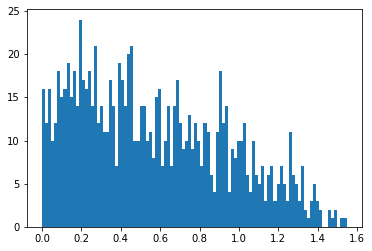

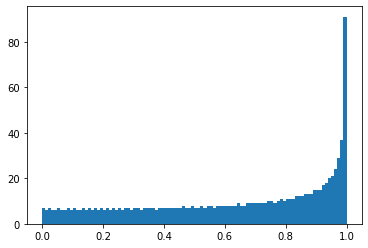

In [135]:
# put your samples in the variable samples
import matplotlib.pyplot as plt
import math



#inverse function x = argsin(U)
uniform_samples = np.random.uniform(low=0.0, high=1.0, size=1000)
samples = np.arcsin(uniform_samples)
plt.figure(1)
plt.hist(samples, bins=100)

X = np.linspace(0, np.pi/2, 1000)
true_density = [math.sin(x) for x in X]
    
plt.figure(2)
plt.hist(true_density, bins=100)
plt.show()

In [141]:
# Produce 1000 experiments, in which each experiment you draw
# 1000 samples from F. Store the value of the empirical mean of each
# experiment and compute the 0.025 and the 0.975 quantiles

emp_means = []
for i in range (1000):
    uniform_samples = np.random.uniform(low=0.0, high=1.0, size=1000)
    samples = np.arcsin(uniform_samples)
    emp_means.append(np.mean(samples))

print(emp_means)
means = emp_means # the computed empirical means, should be a list of length 1000

print(np.quantile(means, 0.025))
quantile_0025 = np.quantile(means, 0.025) # the 0.025 quantile
print(np.quantile(means, 0.975))
quantile_0975 = np.quantile(means, 0.975) # the 0.975 quantile


[0.5579069328190633, 0.5676975200839122, 0.5793029791241318, 0.5710830235289828, 0.5795112975621779, 0.5476405423345826, 0.5648136641038746, 0.5737920856351856, 0.5851775542772998, 0.5697733527060107, 0.5673485682869752, 0.5784755882634377, 0.5733664311994626, 0.5713963942299745, 0.561698969087276, 0.5621322765630207, 0.5771439177561366, 0.589676017373188, 0.5621186577589286, 0.5909234418442562, 0.5827863707862445, 0.5580645030897733, 0.5938013902804475, 0.5643192948380416, 0.5568138351100866, 0.5559991213040212, 0.5625520093668487, 0.5573335446468312, 0.553764496780295, 0.5856901510549153, 0.5733850088916007, 0.5782554941104394, 0.5620560239191603, 0.5729640512301389, 0.5581351989030007, 0.5509943660920408, 0.5541943619572917, 0.5723787785418769, 0.5727368342944913, 0.5711723468773948, 0.5567452828880437, 0.58854907167009, 0.5880281614475321, 0.5614061607792755, 0.5695739662351693, 0.5820160052821062, 0.5800079672745285, 0.565490460410276, 0.5805155187309385, 0.5740702448151794, 0.581

In [142]:
# Put your interval in the form

epsilon = np.sqrt(-1/(2*1000)*np.log((1-0.95)/2))

mean_of_emp_means = np.mean(means)

l_edge = mean_of_emp_means-epsilon # The left edge of the interval
r_edge = mean_of_emp_means+epsilon # The right edge of the interval
print("Confidence interval around the mean is [%.2f,%.2f]" % (l_edge,r_edge))

Confidence interval around the mean is [0.53,0.61]


---
## Exam vB, PROBLEM 3
Maximum Points = 8


## Concentration of measure

As you recall, we said that concentration of measure was simply the phenomenon where we expect that the probability of a large deviation of some quantity becoming smaller as we observe more samples: [8/22 points per correct answer]

1. Which of the following will exponentially concentrate, i.e. for some $C_1,C_2,C_3,C_4 $ 
$$
    P(Z - \mathbb{E}[Z] \geq \epsilon) \leq C_1 e^{-C_2 n \epsilon^2} \wedge C_3 e^{-C_4 n (\epsilon+1)} \enspace .
$$

    1. The empirical mean of i.i.d. sub-Gaussian random variables?
    2. The empirical mean of i.i.d. sub-Exponential random variables?
    3. The empirical mean of i.i.d. bounded random variables?
    4. The empirical variance of i.i.d. bounded random variables?
    5. The empirical mean of i.i.d. random variables with finite variance?
    6. The empirical variance of i.i.d. random variables with finite variance?
    7. The empirical variance of i.i.d. sub-Gaussian random variables?
    8. The empirical third moment of i.i.d. bounded random variables?
    9. The empirical fourth moment of i.i.d. sub-Gaussian random variables?
    10. The empirical mean of i.i.d. deterministic random variables?
    11. The empirical tenth moment of i.i.d. Bernoulli random variables?

2. Which of the above will concentrate in the weaker sense, that for some $C_1$
$$
    P(Z - \mathbb{E}[Z] \geq \epsilon) \leq \frac{C_1}{n \epsilon^2}?
$$

gaussian mean
mean: -0.00	std: 0.03	skew: 1.57	kurtosis: 125.93
sub gaussian mean
mean: -0.00	std: 0.01	skew: -6.18	kurtosis: 223.67
sub exp mean
mean: 1.00	std: 0.04	skew: 27.38	kurtosis: 1757.37
bounded rv mean
mean: 5.00	std: 0.08	skew: 3.31	kurtosis: 107.15
deterministic mean
mean: 0.50	std: 0.01	skew: -1.59	kurtosis: 114.32


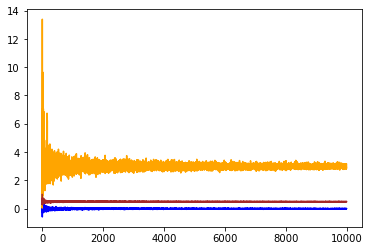

In [111]:
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

def standardize(data):
    mean = np.mean(data)
    std = np.sqrt(np.var(data))
    return (data-mean)/std

num = []
normal_mean = []
normal_var = []
mean_sub_gauss = [] #1
mean_sub_exp = [] #2
mean_bounded_rv = [] #3
var_bounded_rv = [] #4
mean_finite_ = [] #5
var_finite_ = [] #6
var_sub_gauss = [] #7
m3_bounded_rv = [] #8
m4_sub_gauss = [] #9
mean_deterministic = [] #10
m10_bernouli = [] #11

def print_basic_stats(data):
    print("mean: %.2f\tstd: %.2f\tskew: %.2f\tkurtosis: %.2f" % (np.mean(data),np.std(data),skew(data),kurtosis(data,fisher=False)))


for n in range (1,10000):
    num.append(n)
    normal = np.random.normal(scale=1,size=n)
    sub_gauss = np.random.normal(scale=0.4, size=n)
    sub_exp = np.random.exponential(size=n)
    bounded_rv = np.random.uniform(low=0.0, high=10.0, size=n)
    deterministic = np.random.rand(n)
    bernouli = np.random.binomial(1, 0.5, size=n)
    
    normal_mean.append(np.mean(normal))
    mean_sub_gauss.append(np.mean(sub_gauss))
    mean_sub_exp.append(np.mean(sub_exp))
    mean_bounded_rv.append(np.mean(bounded_rv))
    mean_deterministic.append(np.mean(deterministic))
    
    var_sub_gauss.append(np.var(sub_gauss))
    var_bounded_rv.append(np.var(bounded_rv))
    m3_bounded_rv.append(np.mean(np.power(bounded_rv, 3)))
    m4_sub_gauss.append(np.mean(np.power(normal, 4)))
    m10_bernouli.append(np.mean(np.power(bernouli, 10)))
    
"""
    
_=plt.hist(standardize(normal_mean),bins=50,alpha=0.5, color='red')    
#_=plt.hist(standardize(mean_sub_gauss),bins=50,alpha=0.5, color='blue')
#_=plt.hist(standardize(mean_sub_exp),bins=50,alpha=0.5, color='blue')
#_=plt.hist(standardize(mean_bounded_rv),bins=50,alpha=0.5, color='blue')
#_=plt.hist(standardize(mean_deterministic),bins=50,alpha=0.5, color='blue')
#_=plt.hist(standardize(normal_var),bins=50,alpha=0.5, color='blue')
#_=plt.hist(standardize(var_bounded_rv),bins=50,alpha=0.5, color='blue')
#_=plt.hist(standardize(m3_bounded_rv),bins=50,alpha=0.5, color='blue')
_=plt.hist(standardize(m4_sub_gauss),bins=50,alpha=0.5, color='blue')
#_=plt.hist(standardize(m10_bernouli),bins=50,alpha=0.5, color='blue')

"""    
plt.plot(num, normal_mean, 'b')
#plt.plot(num, mean_sub_gauss, 'r')
#plt.plot(num, mean_sub_exp, 'y')
#plt.plot(num, mean_bounded_rv, 'green')
plt.plot(num, mean_deterministic, 'pink')
#plt.plot(num, var_sub_gauss, 'purple')
#plt.plot(num, var_bounded_rv, 'r')
#plt.plot(num, m3_bounded_rv, 'y') #8
plt.plot(num, m4_sub_gauss, 'orange')
plt.plot(num, m10_bernouli, 'brown')


print('gaussian mean')
print_basic_stats(normal_mean)    
   
print('sub gaussian mean')
print_basic_stats(mean_sub_gauss)  

print('sub exp mean')
print_basic_stats(mean_sub_exp)

print('bounded rv mean')
print_basic_stats(mean_bounded_rv)

print('deterministic mean')
print_basic_stats(mean_deterministic)
    


# Answers to part 1, which of the alternatives exponentially concentrate, answer as a list
# i.e. [1,4,5] that is example 1, 4, and 5 concentrate
problem3_answer_1 = [1, 2, 3, 7, 10, 11] #remove: 8 , 4, 5 6, 11 keep: 1, 2, 3, 7,   9 

In [112]:

# Answers to part 2, which of the alternatives concentrate in the weaker sense, answer as a list
# i.e. [1,4,5] that is example 1, 4, and 5 concentrate
problem3_answer_2 =  [1, 2, 3, 4, 5, 7, 8, 9, 10, 11] #remove 6

---
## Exam vB, PROBLEM 4
Maximum Points = 8


In this problem you will be working with a text file `a_sequence.txt`, found in the `data` folder. This contains a sequence of numbers that are observations of a Markov chain. The goal of this exercise is to analyze this sequence in different ways.

1. [2p] Take the file `a_sequence.txt` and load it as a list of integers. Use bash or something to figure out how to parse the file.
2. [2p] Define a Markov chain from this list of integers
    1. What are the states?
    2. How many states are there?
3. [2p] Estimate the transition probability of going from state 42 to state 16?
4. [2p] Find the transition matrix $P$ and compute the matrix power $P^{10} v$ where $v = (1,0,\ldots,0)$.

In [149]:

# Read the file a_sequence.txt and load it as a list of integers. 
# Put your result in the variable "numbers"

with open('a_sequence.txt',mode='r') as f:
    current_line = f.readline()
    nums = current_line.split(' ')

numbers = [int(num) for num in nums]
print(np.unique(numbers))
print(len(np.unique(numbers)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
100


In [150]:

# Construct a Markov chain of this list of integers, that is. 
# EXPLAIN in text what are the states are and what 
# the transition probabilities mean.

#---------Put your explanation between the lines-------------

#100 states are there
#states are represented by integeres from 0 to 100
the sequence represents state transitions. By counting how many times j appear after i and all the apperances of J we can count transition prob

#------------------------------------------------------------

In [152]:
# put the number of states in the variable n_states

n_states = 100

# Now fill in the states, stored as a sorted list of integers
states = np.sort(np.unique(numbers))
states

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [153]:
# Estimate the transition probability of going from $42$ to $16$. 
# You can use the below function if you want


In [154]:
def makeFreqDict(myDataSeq, one = int(1)):
    '''Make a frequency mapping out of a sequence of data - list, array, str.

    Param myDataList, a list of data.
    Return a dictionary mapping each unique data value to its frequency count.'''

    freqDict = {} # start with an empty dictionary

    for res in myDataSeq:

        if res in freqDict: # the data value already exists as a key
                freqDict[res] = freqDict[res] + one #int(1) # add 1 to the count
        else: # the data value does not exist as a key value
            # add a new key-value pair for this new data value, frequency 1
            freqDict[res] = one

    return freqDict # return the dictionary created

In [181]:
# Put your answer here for the transition probability
from Utils import makeFreq

transitions_data = np.stack([numbers[:-1],numbers[1:]])
transition_counts = makeFreq(transitions_data)
transition_counts
print(transition_counts)

from_42 = 0
from_42_to_16 = 0
for arr in transition_counts:
    if (arr[0] == 42):
        from_42 = from_42 + arr[2]
        if (arr[1] == 16) :
            from_42_to_16 = from_42_to_16 + arr[2]

transition_probability = from_42_to_16/from_42
transition_probability

transition_pairs = [(numbers[i], numbers[i+1]) for i in range(len(numbers)-1)]
state_changes = makeFreqDict(transition_pairs)


start_states_arr = [numbers[i] for i in range(len(numbers)-1)]
start_states = makeFreqDict(start_states_arr)
start_states

transition_matrix = np.zeros((100, 100))

for i in range (100):
    for j in range (100):
        if ((i,j) in state_changes.keys()) and (i in start_states.keys()):
            transition_matrix[i][j] = state_changes[(i,j)]/start_states[i]


[[ 0  1  1]
 [ 0  2  2]
 [ 0  6  2]
 ...
 [99 97  1]
 [99 98  1]
 [99 99  2]]
[[0.         0.00909091 0.01818182 ... 0.00909091 0.02727273 0.        ]
 [0.01162791 0.01162791 0.04651163 ... 0.04651163 0.         0.        ]
 [0.         0.00884956 0.02654867 ... 0.01769912 0.00884956 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.00961538]
 [0.         0.01754386 0.00877193 ... 0.00877193 0.00877193 0.        ]
 [0.         0.         0.         ... 0.0125     0.0125     0.025     ]]


In [186]:
# Fill in the transition matrix P as a numpy array of 
# shape (n_states x n_states)
# Make sure it is a transition matrix by checking the column sum
P =np.array(transition_matrix)

# If our initial vector is
v = np.zeros(n_states)
v[0] = 1

# What is P^10 v
steady_state_v = v*P**10
steady_state_v

P_10 = P
for power in range(9):
    P_10 = np.matmul(P_10,P)
    
steady_state_v = np.matmul(v, P_10)
steady_state_v

array([0.01090219, 0.00870086, 0.01130398, 0.01150096, 0.01040217,
       0.01020238, 0.01080124, 0.00890122, 0.01230396, 0.00869959,
       0.00999907, 0.00980222, 0.01030231, 0.01020024, 0.01050064,
       0.01010134, 0.00950096, 0.00990065, 0.01029914, 0.01050102,
       0.01060217, 0.01090071, 0.01010325, 0.00850094, 0.0101012 ,
       0.01330594, 0.00910326, 0.00820096, 0.00910028, 0.01070475,
       0.01060126, 0.00920087, 0.01079943, 0.01000256, 0.00980092,
       0.00909809, 0.00989842, 0.00870104, 0.01000019, 0.01180224,
       0.0108012 , 0.01189942, 0.01000119, 0.00780204, 0.00970036,
       0.00970096, 0.01049837, 0.00990153, 0.00980096, 0.01130186,
       0.00940092, 0.00910093, 0.01050136, 0.0108013 , 0.00929915,
       0.01010007, 0.00999742, 0.01089994, 0.008802  , 0.01060105,
       0.0077992 , 0.00870081, 0.00899938, 0.0090972 , 0.01090139,
       0.00850175, 0.01059822, 0.00970002, 0.00990037, 0.00970123,
       0.01080122, 0.00909941, 0.01010061, 0.01030441, 0.01230

---
## Exam vB, PROBLEM 5
Maximum Points = 8


## SMS spam filtering [8p]

In the following problem we will explore SMS spam texts. The dataset is the `SMS Spam Collection Dataset` and we have provided for you a way to load the data. If you run the appropriate cell below, the result will be in the `spam_no_spam` variable. The result is a `list` of `tuples` with the first position in the tuple being the SMS text and the second being a flag `0 = not spam` and `1 = spam`.

1. [3p] Let $X$ be the random variable that represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. (This is precision)
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.
2. [3p] Estimate the probability that the word "free" or "prize" is in the text given that it is spam. (This is recall) I.e. estimate
$$
    \mathbb{P}(\text{"free" or "prize" is in } X \mid Y = 1) \enspace .
$$
3. [2p] Provide a "90\%" interval of confidence around the true probability from **part 1**. I.e. use the Hoeffding inequality to obtain for your estimate $\hat P$. Find $l > 0$ such that the following holds:
$$
    \mathbb{P}(\hat P - l \leq \mathbb{E}[\hat P] \leq \hat P + l) \geq 0.9 \enspace .
$$

In [188]:

# Run this cell to get the SMS text data
from exam_extras import load_sms
spam_no_spam = load_sms()
spam_no_spam

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0),
 ("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
  1),
 ('U dun say so early hor... U c already then say...', 0),
 ("Nah I don't think he goes to usf, he lives around here though", 0),
 ("FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
  1),
 ('Even my brother is not like to speak with me. They treat me like aids patent.',
  0),
 ("As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
  0),
 ('WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 0906170146

In [ ]:

# fill in the estimate for part 1 here (should be a number between 0 and 1)
problem5_hatP = XXX

In [ ]:

# fill in the estimate for hatP for the double free question in part 2 here (should be a number between 0 and 1)
problem5_hatP2 = XXX

In [ ]:

# fill in the calculated l from part 3 here
problem5_l = XXX